In [1]:
library(readxl)
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
data <- read_excel(path = "tp3.xlsx", sheet = "Feuil1") # On lit les données 
# path : argument pour le chemin du fichier (ici dans le même répertoire)
# sheet: la feuille du fichier à prendre 
# On charge les données dans la variable data
data

Id etu,moyenne s1,moyenne s2,moyenne s3,moyenne s4,moyenne s5,moyenne s6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36
etudiant 2,12.24,13.36,13.25,13.66,14.69,14.98
etudiant 3,9.40,10.36,11.36,11.65,12.53,11.67
etudiant 4,14.25,14.52,14.98,14.27,14.87,15.88
etudiant 5,13.55,13.54,12.57,12.87,13.47,13.94


In [3]:
names(data) <- c("Id_etu", "s1", "s2", "s3", "s4", "s5", "s6") # On renommme les colonnes de `data`
data

Id_etu,s1,s2,s3,s4,s5,s6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36
etudiant 2,12.24,13.36,13.25,13.66,14.69,14.98
etudiant 3,9.40,10.36,11.36,11.65,12.53,11.67
etudiant 4,14.25,14.52,14.98,14.27,14.87,15.88
etudiant 5,13.55,13.54,12.57,12.87,13.47,13.94


In [4]:
# On applique la régression linéaires sur les colonnes 2 à 6
semestres <- 2:7

## Explication de la régression linéaire

Pour toutes données de type `data.frame`, on peut récupèrer les éléments avec la syntaxe suivante : 

```r
data[1 ,] # on prend la première ligne

data[, 1] # on prend la première colonne

```


In [5]:
data[1,]

Id_etu,s1,s2,s3,s4,s5,s6
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36


In [6]:
data[,1]

Id_etu
<chr>
etudiant 1
etudiant 2
etudiant 3
etudiant 4
etudiant 5


### La fonction `apply`

`apply` permet d'appliquer une fonction sur chaque ligne ou chaque colonne d'un `data.frame`.

- Le première argument `data[, semestres]` : on souhaite appliquer un régression linéaire avec les données des lignes de notes (donc d'indice de colonne 2 à 7; on exclut la première colonne avec le nom des étudiants). 
- `1` : indique qu'on applique la fonction par ligne

```r
function(x) { # applies over rows
  model <- lm(x ~ semestres, data = data.frame(semestres, x))  # lm:Régression linéaire
  predict(model, newdata = data.frame(semestres = 7))  # ax+b
}
```
L'argument `x` correspond à une ligne du tableau.

Pour chaque ligne, on fait une régression linéaire.



In [7]:
# Première ligne 

l1 <- as.numeric(data[1,2:7])
l1

[1] 10.27 11.36 10.69 12.36 11.98 12.36

In [8]:
lm(l1 ~ semestres, data = data.frame(semestres, data[1,semestres]))


Call:
lm(formula = l1 ~ semestres, data = data.frame(semestres, data[1, 
    semestres]))

Coefficients:
(Intercept)    semestres  
     9.7059       0.3994  


## La fonction `predict`

Dans `predict` on met le modèle en premier argument puis le deuxième argument donne le `x` pour lequel on emploue la drote de régression.

In [9]:
data$prediction_s7 <- apply(data[, semestres], 1, function(x) { # applies over rows
  model <- lm(x ~ semestres, data = data.frame(semestres, x))  # lm:Régression linéaire
  predict(model, newdata = data.frame(semestres = 7))  # ax+b
})

data


Id_etu,s1,s2,s3,s4,s5,s6,prediction_s7
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36,12.50190
etudiant 2,12.24,13.36,13.25,13.66,14.69,14.98,14.98952
etudiant 3,9.40,10.36,11.36,11.65,12.53,11.67,12.45810
etudiant 4,14.25,14.52,14.98,14.27,14.87,15.88,15.40143
etudiant 5,13.55,13.54,12.57,12.87,13.47,13.94,13.46905


In [10]:
# Renommons la colonne 'prediction_s7'

names(data) <- c("Id_etu", "s1","s2", "s3", "s4", "s5", "s6", "s7")
data

Id_etu,s1,s2,s3,s4,s5,s6,s7
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
etudiant 1,10.27,11.36,10.69,12.36,11.98,12.36,12.50190
etudiant 2,12.24,13.36,13.25,13.66,14.69,14.98,14.98952
etudiant 3,9.40,10.36,11.36,11.65,12.53,11.67,12.45810
etudiant 4,14.25,14.52,14.98,14.27,14.87,15.88,15.40143
etudiant 5,13.55,13.54,12.57,12.87,13.47,13.94,13.46905


In [11]:
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## `data_long`

Initialiement on a les données ci-dessus avec une ligne par étudiant. Pour `ggplot2` on doit dépivoter les données de façon à ce que une ligne du tableau correspond à la note d'un étudiant durant un semester (voir ci-dessous).  

Avec la fonction `pivot_longer` (package `tidyr`), on donne en premier argument la `data.frame`, puis en deuxième argument les colonnes à dépivoter sous forme de vecteur, en troisième arguments les noms de colonnes pour les semestres et les notes respectivement.

Avec la fonction `melt` (package `reshape`), on donne en premier argument la `data.frame`, puis la colonne identifiante (optionelle), en troisième les colonnes à dépivoter, ensuite le nom des colonnes.

Les deux fonctions sont globalement équivalentes, et le choix va dépendre des bibliothèques que vous employez.

In [17]:
melt(data,  measure.vars = c("s1","s2", "s3", "s4", "s5", "s6", "s7"), variable.name = "variable", value.name = "value" )

Id_etu,variable,value
<chr>,<fct>,<dbl>
etudiant 1,s1,10.27000
etudiant 2,s1,12.24000
etudiant 3,s1,9.40000
etudiant 4,s1,14.25000
etudiant 5,s1,13.55000
etudiant 1,s2,11.36000
etudiant 2,s2,13.36000
etudiant 3,s2,10.36000
etudiant 4,s2,14.52000


In [12]:
melt(data, id.vars = "Id_etu", measure.vars = c("s1","s2", "s3", "s4", "s5", "s6", "s7"), variable.name = "variable", value.name = "value" )

Id_etu,variable,value
<chr>,<fct>,<dbl>
etudiant 1,s1,10.27000
etudiant 2,s1,12.24000
etudiant 3,s1,9.40000
etudiant 4,s1,14.25000
etudiant 5,s1,13.55000
etudiant 1,s2,11.36000
etudiant 2,s2,13.36000
etudiant 3,s2,10.36000
etudiant 4,s2,14.52000


In [13]:
# Ajouter les prévisions au dataframe
predictions <- data.frame(Id_etu = data$Id_etu, variable = "s7", value = data$s7)
data_long <- data |> 
pivot_longer(cols = c("s1","s2", "s3", "s4", "s5", "s6", "s7"), names_to = "variable", values_to = "value")
data_long

Id_etu,variable,value
<chr>,<chr>,<dbl>
etudiant 1,s1,10.27000
etudiant 1,s2,11.36000
etudiant 1,s3,10.69000
etudiant 1,s4,12.36000
etudiant 1,s5,11.98000
etudiant 1,s6,12.36000
etudiant 1,s7,12.50190
etudiant 2,s1,12.24000
etudiant 2,s2,13.36000


## `ggplot`

On prend `variable` en abscisse (les semestres) et `value` en ordonnée (les notes)

`as.factor` indique que la colonne doit être interprêtée comme une catégorie.


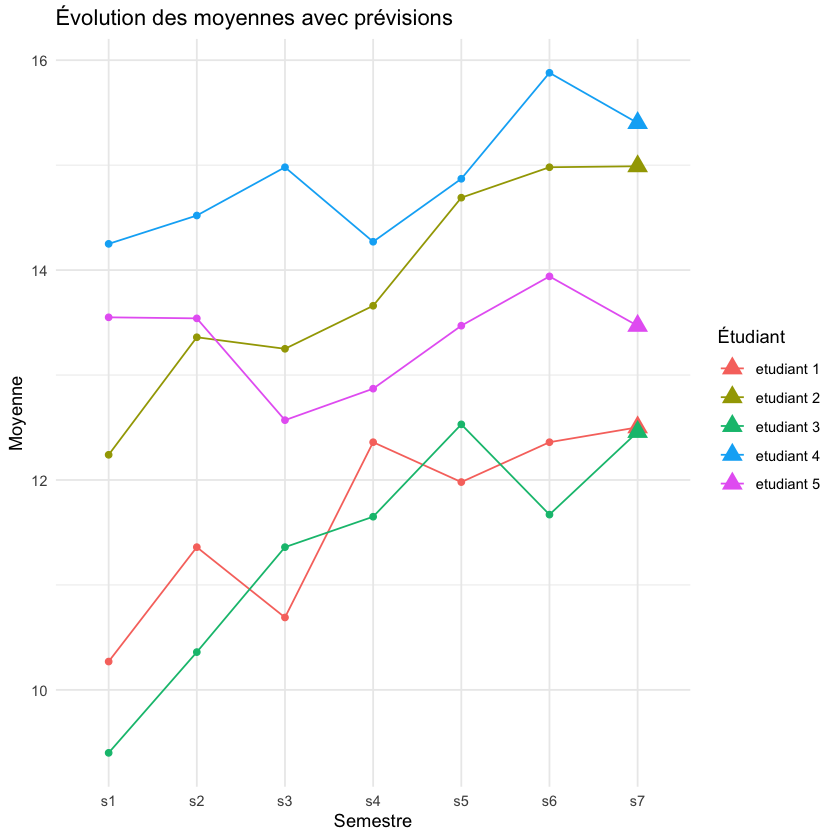

In [14]:
# Graphique
ggplot() +
  geom_line(data = data_long, aes(x = variable, y = value, group = Id_etu, color = as.factor(Id_etu))) +
  geom_point(data = data_long, aes(x = variable, y = value, color = as.factor(Id_etu))) +
  geom_point(data = predictions, aes(x = variable, y = value, color = as.factor(Id_etu)), shape = 17, size = 4) +  #  Triangle pour prévision
  theme_minimal() +
  labs(title = "Évolution des moyennes avec prévisions", x = "Semestre", y = "Moyenne", color = "Étudiant")



## Références 


- Barnier, J. (2020). [*Introduction à R et au tidyverse*](https://juba.github.io/tidyverse/04-bivarie.html#r%C3%A9gression-lin%C3%A9aire).
- Divers (2023). [Série d’ateliers R du CSBQ](https://r.qcbs.ca/workshop04/book-fr/r%C3%A9gression-lin%C3%A9aire-avec-r.html).
- Lamrange, J. (2025). [Guide pour l’analyse de données d’enquêtes avec R](https://larmarange.github.io/guide-R/analyses/regression-lineaire.html).